## chapter 02 Linear Regression

- 2.1 simple linear regression 一元线性回归
- 2.2 multiple linear regression 多元线性回归
- 2.3 polynomial regression 多项式回归
- 2.4 how to train models & cost function

### 2.1 simple linear regression 一元线性回归

In [20]:
# load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# data
X_train1 = [[6], [8], [10], [14], [18]]
y_train1 = [[7], [9], [13], [17.5], [18]]

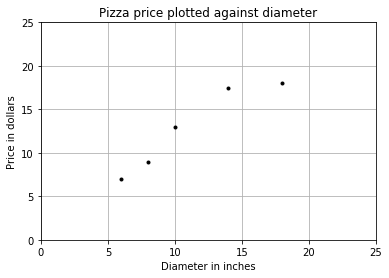

In [3]:
# plot X and y
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X_train1, y_train1, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [4]:
# Linear regression model
from sklearn.linear_model import LinearRegression
# 初始化
lrg = LinearRegression()
# 训练
lrg.fit(X_train1, y_train1)
# 预测
lrg.predict([12])
print('A 12" pizza should cost: $%.2f' % lrg.predict([12])[0])

A 12" pizza should cost: $13.68


d:\application\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
d:\application\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [5]:
# evaluating the fitness of model using cost function
## cost function, loss function
## residuals or training errors
## prediction errors or test errors
## residual sum of squares
print('Residual sum of squares: %.2f' % np.mean((lrg.predict(X) - y) ** 2))

Residual sum of squares: 1.75


In [26]:
# variance 
var_x = np.var([6, 8, 10, 14, 18], ddof = 1)
print('var_x =', var_x)
# covariance
cov_xy = np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]
print('cov_xy =', cov_xy)
# β = cov_xy / var_x
beta = cov_xy / var_x
print(beta)
# α = ybar - β * xbar
xbar = (6 + 8 + 10 + 14 + 18) / 5
ybar = (7 + 9 + 13 + 17.5 + 18) / 5
alpha = ybar - beta * xbar
print(alpha)
# model
# y = 1.9655 + 0.9763 * x
print('if x = 11, then y = ', 1.9655 + 0.9763 * 11)

var_x = 23.2
cov_xy = 22.65
0.976293103448
1.96551724138
if x = 11, then y =  12.7048


In [27]:
# Evaluating model
# test dataset
X_test1 = [[8], [9], [11], [16], [12]]
y_test1 = [[11], [8.5], [15], [18], [11]]
# R-squared
y_test_bar = (11 + 8.5 + 15 + 18 + 11) / 5    # 12.7
ss_total = (11 - 12.7)**2 + (8.5 - 12.7)**2 + (15 - 12.7)**2 + (18 - 12.7)**2 + (11 - 12.7)**2
print('ss_total = ', ss_total)
fx1 = 1.9655 + 0.9763 * X_test1[0][0]
fx2 = 1.9655 + 0.9763 * X_test1[1][0]
fx3 = 1.9655 + 0.9763 * X_test1[2][0]
fx4 = 1.9655 + 0.9763 * X_test1[3][0]
fx5 = 1.9655 + 0.9763 * X_test1[4][0]
ss_res = (11 - fx1)**2 + (8.5 - fx2)**2 + (15 - fx3)**2 + (18 - fx4)**2 + (11 - fx5)**2
print('ss_res = ', ss_res)
R_squared = 1 - ss_res / ss_total
print('R-squared = ', R_squared)

ss_total =  56.8
ss_res =  19.198213589999995
R-squared =  0.6620032818661973


In [28]:
# modeling using scikit-learn
# evaluating model performance with R-squared
lrg.score(X_test1,  y_test1)

0.6620052929422553

### 2.2 multiple linear regression 多元线性回归

In [31]:
# load pacakges
from sklearn.linear_model import LinearRegression

# prepare data
X_train2 = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y_train2 = [[7], [9], [13], [17.5], [18]]
X_test2 = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test2 = [[11], [8.5], [15], [18], [11]]

# modeling
mlrg = LinearRegression()
mlrg.fit(X_train2, y_train2)

# prediction
predictions = mlrg.predict(X_test2)

# evaluate model
print('R-squared = ', mlrg.score(X_test2, y_test2))

R-squared =  0.770167773132


In [32]:
for i, prediction in enumerate(predictions):
    print('Predicted:%s, Target:%s' % (prediction, y_test2[i]))

Predicted:[ 10.0625], Target:[11]
Predicted:[ 10.28125], Target:[8.5]
Predicted:[ 13.09375], Target:[15]
Predicted:[ 18.14583333], Target:[18]
Predicted:[ 13.3125], Target:[11]


### 2.3 polynomial regression 多项式回归

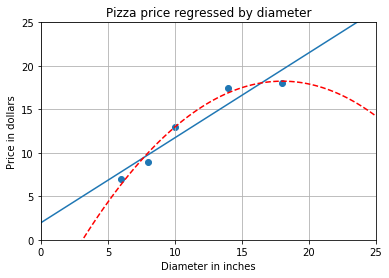

simple linear regression model R-squared: 0.809726797708
quadratic regression R-squared: 0.867544365635


In [42]:
# load packages
from sklearn.preprocessing import PolynomialFeatures

# 数据准备：用一元线性回归的训练集X_train1&y_train1，用新的测试集
X_train3 = [[6], [8], [10], [14], [18]]
y_train3 = [[7], [9], [13], [17.5], [18]]
X_test3 = [[6], [8], [11], [16]]
y_test3 = [[8], [12], [15], [18]]

# 通过PolynomialFeatures获得二次的特征，degree = 2
quadratic_featurizer = PolynomialFeatures(degree = 2)
# 把训练集转换成二次特征
X_train_quadratic = quadratic_featurizer.fit_transform(X_train3)
# 把测试集转换成二次特征
X_test_quadratic = quadratic_featurizer.transform(X_test3)

# 建模
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train3)

# 预测
regressor_quadratic.predict(X_test_quadratic)

# 把二项式回归和一元线性回归绘制到同一个图形中
## 准备100个x
xx = np.linspace(0, 26, 100)
## 把100个x转换成二项式形式
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
## 绘制一元线性回归图形
plt.plot(xx, lrg.predict(xx.reshape(xx.shape[0], 1)))
## 绘制二项式回归图形
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), 
         c = 'r', 
         linestyle = '--')
## 绘制训练集数据点
plt.scatter(X_train3, y_train3)
## 修饰图形
plt.title('Pizza price regressed by diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

# evaluating model
print('simple linear regression model R-squared:', lrg.score(X_test3, y_test3))
print('quadratic regression R-squared:', regressor_quadratic.score(X_test_quadratic, y_test3))

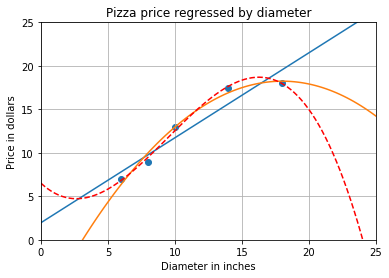

simple linear regression model R-squared: 0.809726797708
quadratic regression R-squared: 0.867544365635
cubic linear regression R-squared: 0.835692415604


In [43]:
# 用更高次的多项式回归（如3次），看看效果如何
cubic_featurizer = PolynomialFeatures(degree=3)
X_train_cubic = cubic_featurizer.fit_transform(X_train3)
X_test_cubic = cubic_featurizer.transform(X_test3)

# modeling
regressor_cubic = LinearRegression()
regressor_cubic.fit(X_train_cubic, y_train3)

# plot，对比一元线性回归，二次多项式回归，三次多项式回归
xx_cubic = cubic_featurizer.transform(xx.reshape(xx.shape[0], 1))
## 一元线性回归
plt.plot(xx, lrg.predict(xx.reshape(xx.shape[0], 1)))
## 二项式回归
plt.plot(xx, regressor_quadratic.predict(xx_quadratic))
## 三次多项式回归
plt.plot(xx, regressor_cubic.predict(xx_cubic), 
         c = 'r', 
         linestyle = '--')
## 训练集数据点
plt.scatter(X_train3, y_train3)
## 修饰图形
plt.title('Pizza price regressed by diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

# evaluating model
print('simple linear regression model R-squared:', lrg.score(X_test3, y_test3))
print('quadratic regression R-squared:', regressor_quadratic.score(X_test_quadratic, y_test3))
print('cubic linear regression R-squared:', regressor_cubic.score(X_test_cubic, y_test3))
# 发现三次的模型的效果不如二次，但是比一元线性回归好一些

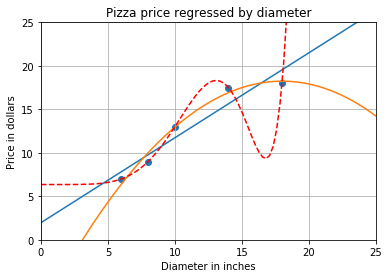

simple linear regression model R-squared: 0.809726797708
quadratic regression R-squared: 0.867544365635
cubic linear regression R-squared: 0.835692415604
nineth polynomial regressor R-squared: -0.094356667043


In [46]:
# 我们再来看看更离谱的情况，九次

## 转换
nine_featurizer = PolynomialFeatures(degree=9)

## prepare data
X_train_nine = nine_featurizer.fit_transform(X_train3)
X_test_nine = nine_featurizer.transform(X_test3)
xx_nine = nine_featurizer.transform(xx.reshape(xx.shape[0], 1))

## modeling
regressor_nine = LinearRegression()
regressor_nine.fit(X_train_nine, y_train3)

## predict and plot，对比一元线性回归，二次多项式回归和九次多项式回归
plt.plot(xx, lrg.predict(xx.reshape(xx.shape[0], 1)))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic))
plt.plot(xx, regressor_nine.predict(xx_nine), 
         c = 'r', 
         linestyle = '--')
plt.scatter(X_train3, y_train)
## 修饰图形
plt.title('Pizza price regressed by diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

# 评估模型
print('simple linear regression model R-squared:', lrg.score(X_test3, y_test3))
print('quadratic regression R-squared:', regressor_quadratic.score(X_test_quadratic, y_test3))
print('cubic linear regression R-squared:', regressor_cubic.score(X_test_cubic, y_test3))
print('nineth polynomial regressor R-squared:', regressor_nine.score(X_test_nine, y_test3))
# 发现九次多项式模型的R方为负数，表示模型的过拟合非常严重了

### 2.3-2 Applying of linear regression

In [50]:
# Applying of linear regression
# 用线性回归模型来预测红酒的得分

# load packages
import pandas as pd

# load data
df = pd.read_csv('./code_from_author/Chapter_02_Codes/winequality-red.csv', 
                 sep = ';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


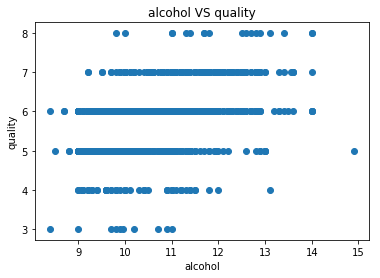

In [58]:
# 探索一下各个变量与红酒得分的关系
plt.scatter(df['alcohol'], df['quality'])
plt.title('alcohol VS quality')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

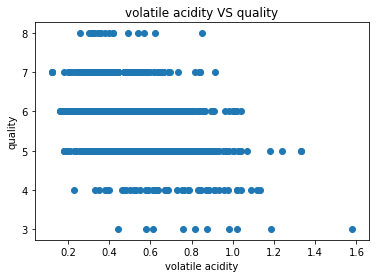

In [59]:
plt.scatter(df['volatile acidity'], df['quality'])
plt.title('volatile acidity VS quality')
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

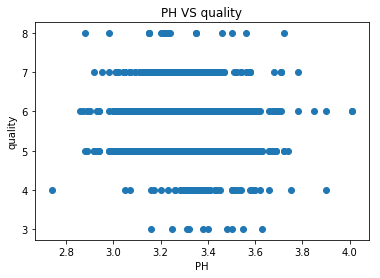

In [60]:
plt.scatter(df['pH'], df['quality'])
plt.title('PH VS quality')
plt.xlabel('PH')
plt.ylabel('quality')
plt.show()

In [61]:
# 相关系数
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [62]:
# 建立多元线性回归模型预测红酒得分

from sklearn.cross_validation import train_test_split

# prepare data
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y random_state = 123)

# modeling 
lrg = LinearRegression()
lrg.fit(X_train, y_train)

# evaluating model
print('R-squared:', lrg.score(X_test, y_test))
# 发现模型的效果很不好，我们下面使用交叉验证，得到更好的模型

R-squared: 0.299918836268


### 2.4 how to train models & cost function